# Data Science With Python : Thresholding with open CV

In this tutorail, I will be comparing three OpenCV thresholding techniques
1) Simple Thresholding
2) Otsu's Thresholding
3) Adaptive Thresholding.

In [5]:
# Importing required packages
import cv2
import numpy as np
from matplotlib import pyplot as plt

## 1. Simple Thresholding

Binary Thresholding is the most basic Thresholding approach. The same threshold value is used for each pixel. If the pixel value is less than or equal to the threshold, it is set to 0, otherwise it is set to the maximum value. In Simple thresholding, we have compared five simple thresholding techniques using functions `cv2.THRESH_BINARY`, `cv2.THRESH_BINARY_INV`, `cv.THRESH_TRUNC`, `cv.THRESH_TOZERO`, `cv.THRESH_TOZERO_INV`.

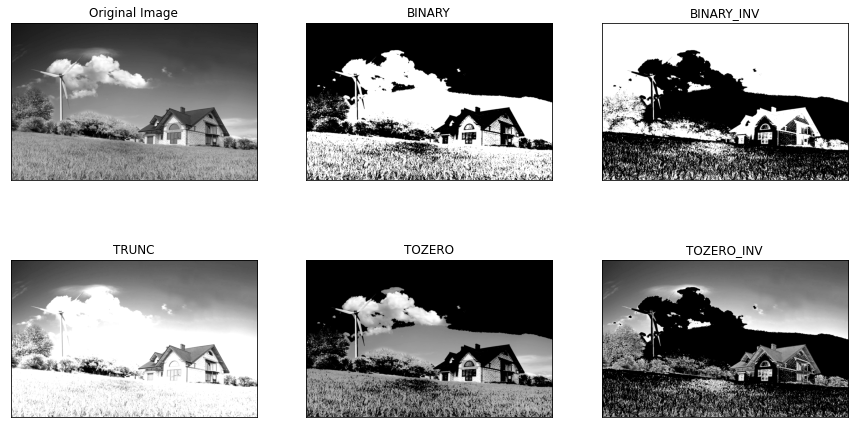

In [6]:
img = cv2.imread('./assets/house.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15,8))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## 2. Otsu Threshold

For a bimodal image, Otsu binarization automatically calculates a threshold value from the image histogram.

It use the `cv2.threshold()` function with the `cv2.THRESH_OTSU` option. Simply set the threshold value to zero. The algorithm then chooses the best threshold value and returns it to us as `retVal`, the second output. The `retVal` remains the same as the threshold value we chose if Otsu thresholding is not utilised.

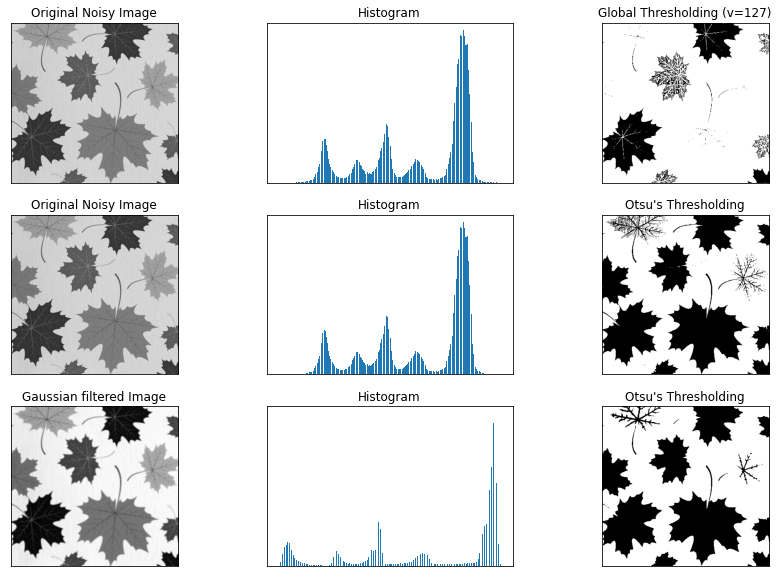

In [7]:
img = cv2.imread('./assets/maple.jpeg',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize=(15,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

## 3. Adaptive Thresholding

It's possible that using a global threshold value isn't the best option. where the image has various illumination conditions in various regions. In that situation, adaptive thresholding might be a good option. It employs an algorithm that calculates the threshold for small areas of an image, allowing us to obtain various thresholds for different areas of the same image and providing better results for images with varied lighting conditions.

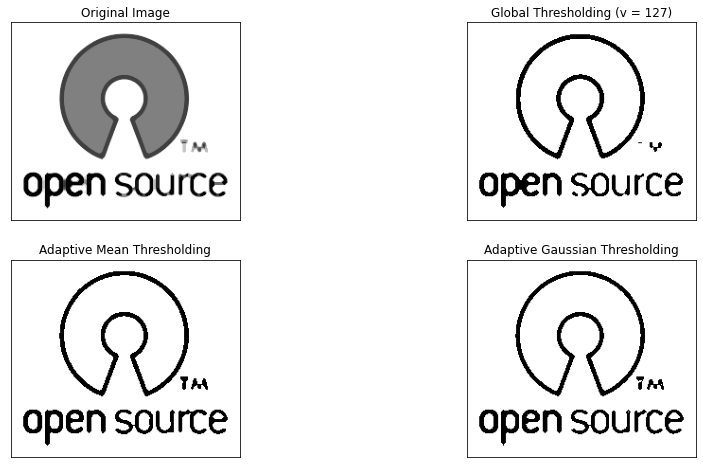

In [8]:
img = cv2.imread('./assets/os.png',0)
img = cv2.medianBlur(img,5)

# Global thresholding
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Adaptive thresholding
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

# plot all the result images 
plt.figure(figsize=(15,8))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## **Observations:-** 

a) We began by performing simple thresholding, which needs us to manually give a T value. However, we immediately recognised that manually entering a T value is inconvenient and compels us to hardcode this value, meaning that this solution will not work in all cases.

b) We then moved on to Otsu's thresholding approach, which assumes a bi-modal distribution of the grayscale representation of our input image and automatically computes the ideal value of T for us.

c) In Adaptive thresholding, the algorithm calculated the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.